# Introduction
---
The aim of this guided project is to expand the visualization of the gender gap across different college degrees already completed in a previous project. 

Until now the focus has been on STEM degrees. In this project, additional plots will be generated in order to compare the gender gap across all degrees recorded in a dataset that was cleaned and compiled by [Randal Olson](http://www.randalolson.com/). The dataset can be found in [this](http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/) blog post

# Import libraries and data

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [36]:
# Preview dataset
print(women_degrees['Year'].describe())
women_degrees.head()

count      42.000000
mean     1990.500000
std        12.267844
min      1970.000000
25%      1980.250000
50%      1990.500000
75%      2000.750000
max      2011.000000
Name: Year, dtype: float64


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


The dataset above shows the percentage of female graduates from each degree from 1970 to 2011. The percentage of male graduates from each degree can therefore be determined by subtracting the number indicated in each cell from 100.

# Plot STEM categories
The following "starter code" was provided to become familiar with the data set and includes a visualization aldready created during a previous [lesson](https://www.dataquest.io/m/148-color-layout-and-and-annotations/) on Dataquest.io. This visualization only includes STEM degrees.

Comments were not included in the starter code but were added for clarity

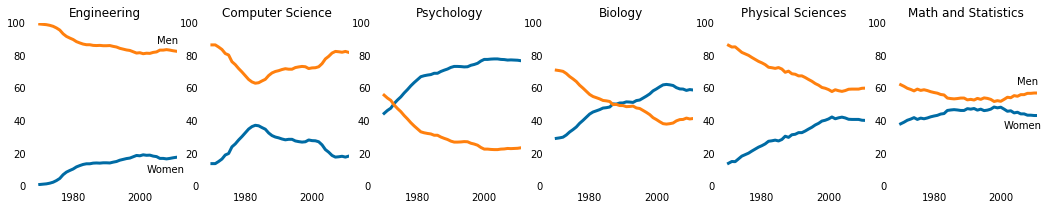

In [7]:
#Define colours and list of STEM categories
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

#Create blank figure with defined size
fig = plt.figure(figsize=(18, 3))

#Loop to create plots for each catergory in stem_cats
for sp in range(len(stem_cats)):
    #Define position of plot in current iteration
    ax = fig.add_subplot(1,6,sp+1)
    #Create plots for men and women
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    #Add labels to first and last plots only to reduce clutter
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

# Plot all categories
The "starter code" above can now be expanded to plot charts for all degree categories. Degrees are plotted in columns depending on their category as shown below:

|Column 1|Column 2|Column 3|
|---|---|---|
|STEM|Liberal Arts|Other|

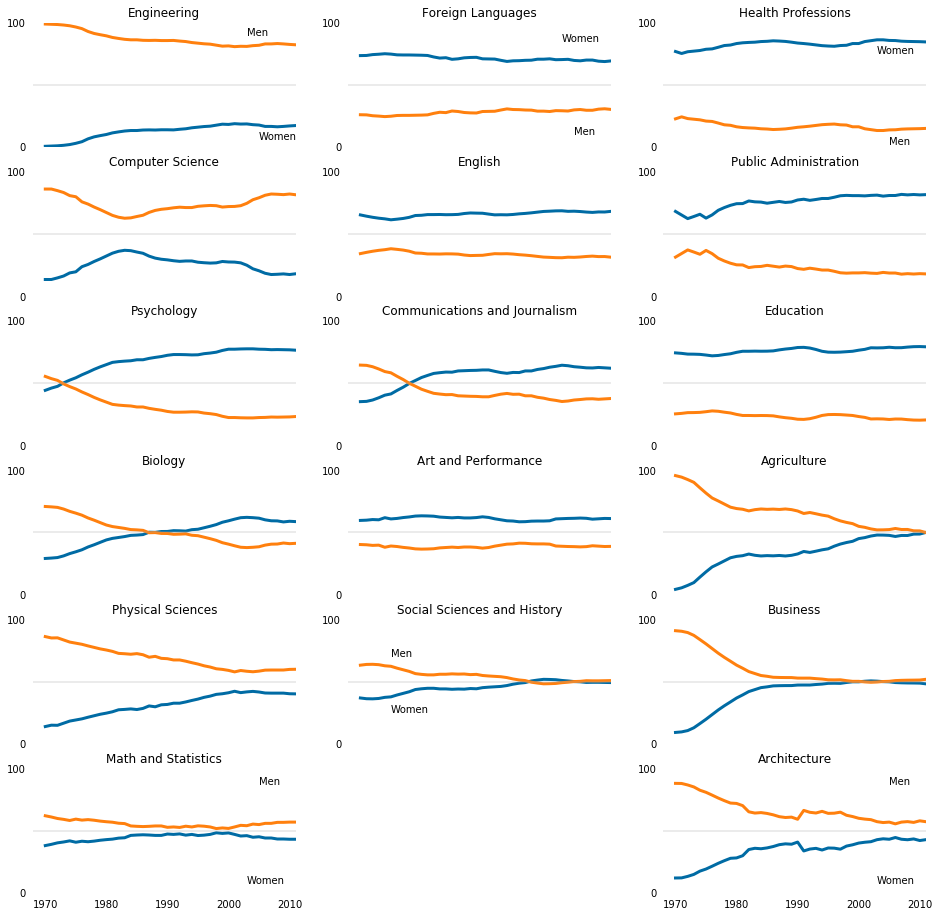

In [58]:
fig = plt.figure(figsize = (16,16))

#First column of charts. Count for loop in 3's to access first column of each row.
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
for sp in range(0,16,3):
    ax = fig.add_subplot(6,3,sp+1)
    #Get category number by diving sp by 3. Division changes data type to float, so change it back to int.
    category = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[category]], c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[category]], c=cb_orange, linewidth=3)
    
    #Remove spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    #Settings for each
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[category])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_yticks([0,100])
 
    #Add horizontal line at y = 50 which is grey in colour and has transparency set to 0.3 using alpha argument
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    #Add labels to first and last charts
    if category == 0:
        ax.text(2003, 90, 'Men')
        ax.text(2005, 6, 'Women')
    elif category == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    
    #Use axis labels on bottom chart only to improve clarity
    if category != 5:
        ax.tick_params(labelbottom='off')
    else:
        ax.tick_params(labelbottom='on')

#Second column of charts. Count for loop in 3's starting from 2 to access second column of each row
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
#For loop to run only 5 times because lib_arts only has 5 categories
for sp in range(1,14,3):
    ax = fig.add_subplot(6,3,sp+1)
    #Get category number by diving sp by 3. Division changes data type to float, so change it back to int.
    category = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[category]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[category]], c=cb_orange, label='Men', linewidth=3)
    
    #Remove spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    #Settings for each
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[category])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_yticks([0,100])
  
    #Add horizontal line at y = 50 which is grey in colour and has transparency set to 0.3 using alpha argument
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    #Add labels to first and last charts
    if category == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif category == 4:
        ax.text(1975, 70, 'Men')
        ax.text(1975, 25, 'Women')
    
    #Use axis labels on bottom chart only to improve clarity
    if category != 5:
        ax.tick_params(labelbottom='off')
    else:
        ax.tick_params(labelbottom='on')
        
#Third column of charts. Count for loop in 3's starting from 3 to access third column of each row
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
for sp in range(2,19,3):
    ax = fig.add_subplot(6,3,sp+1)
    #Get category number by diving sp by 3. Division changes data type to float, so change it back to int.
    category = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[category]], c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[category]], c=cb_orange, linewidth=3)
    
    #Remove spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    #Settings for each
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[category])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_yticks([0,100])
    
    #Add horizontal line at y = 50 which is grey in colour and has transparency set to 0.3 using alpha argument
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    #Add labels to first and last charts
    if category == 0:
        ax.text(2003, 75, 'Women')
        ax.text(2005, 2, 'Men')
    elif category == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    
    #Use axis labels on bottom chart only to improve clarity
    if category != 5:
        ax.tick_params(labelbottom=False)
    else:
        ax.tick_params(labelbottom=True)
    



# Re-code using a plotting function
While the code above works and achieves the correct output, it is quite inefficient because very similar code had to be copy-pasted three times over. In the block below, I've put the plotting block of code into a function that can be called three times (once for each column). The arguments that must be sent to this function are described below:

|Argument|Description|
|---|---|
|start|int indicating start value of the range used to determine the plot's position|
|end|int indicating end value of the range used to determine the plot's position|
|degrees|list of the majors to be used for the plots in each column|
|num_charts|number of degrees in the category|
|top_label_pos|int indicating the position of the 'Women' label on the top chart|


In [194]:
def plotter(start, end, category, num_charts, top_label_pos):
    for sp in range(start, end, 3):
        ax = fig.add_subplot(6,3,sp+1)
        #Get category number by diving sp by 3. Division changes data type to float, so change it back to int for list indexing
        col = int(sp/3)
        ax.plot(women_degrees['Year'], women_degrees[category[col]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[category[col]], c=cb_orange, label='Men', linewidth=3)

        #Remove spines
        for key,spine in ax.spines.items():
            spine.set_visible(False)

        #Settings for each
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(category[col])
        ax.tick_params(bottom="off", top="off", left="off", right="off")
        ax.set_yticks([0,100])

        #Add horizontal line at y = 50 which is grey in colour and has transparency set to 0.3 using alpha argument
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

        #Add labels to first and last charts
        if col == 0:
            #Assign correct labels by checking if first value of first degree is > or < 50%
            if women_degrees[category[0]].iloc[0] < 50:
                top = 'Men'
                bottom = 'Women'
            else:
                top = 'Women'
                bottom = 'Men' 
            ax.text(2003, top_label_pos, top)
            ax.text(2005, 2, bottom)
        elif col == num_charts:
            #Assign correct labels by checking if first value of last degree is > or < 50%
            if women_degrees[category[num_charts]].iloc[-1] < 50:
                top = 'Men'
                bottom = 'Women'
            else:
                top = 'Women'
                bottom = 'Men'
            ax.text(2005, 87, top)
            ax.text(2003, 7, bottom)

        #Use axis labels on bottom chart only to improve clarity
        if col != num_charts:
            ax.tick_params(labelbottom = False)
        else:
            ax.tick_params(labelbottom = True)
    

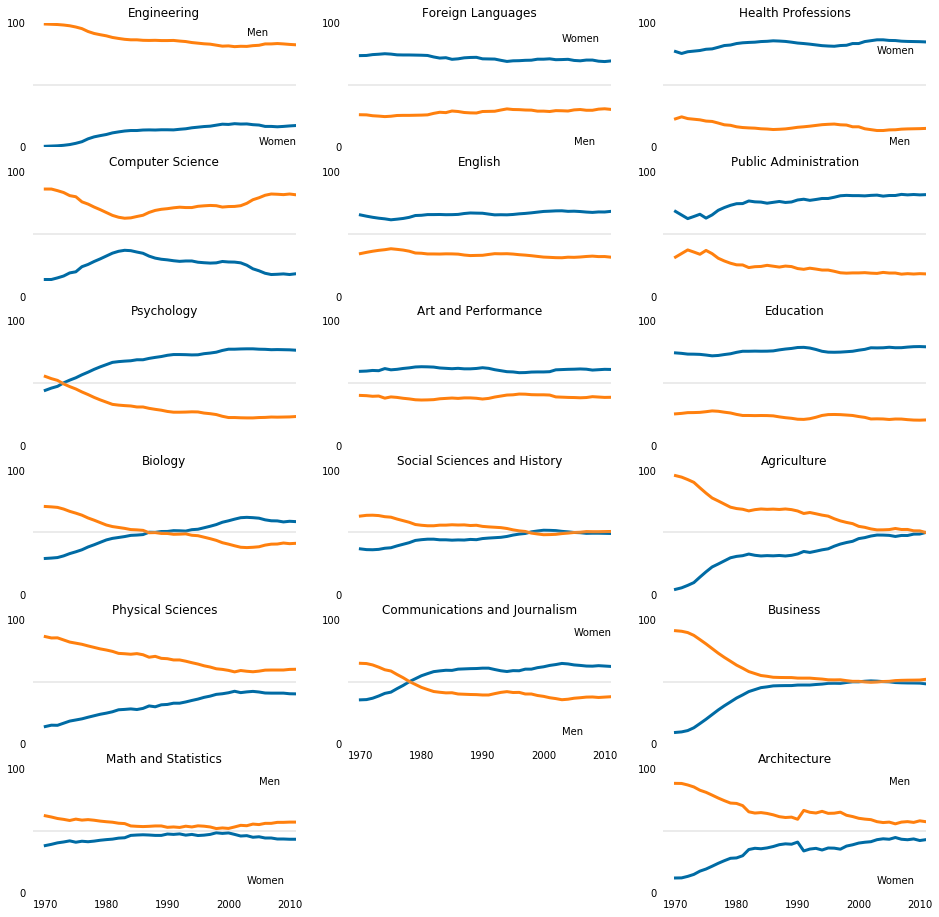

In [195]:
#Define list of each degrees belonging to each category
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Art and Performance', 'Social Sciences and History', 'Communications and Journalism']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

#Create figure object and run plotter function for each category of degrees
fig = plt.figure(figsize = (16,16))
plotter(0, 17, stem_cats,5, 90)
plotter(1, 14, lib_arts_cats,4, 85)
plotter(2, 19, other_cats,5, 75)

#Save image before showing plots
#Saved image is blank if this line is run after showing plot
plt.savefig('gender_degrees.png')
plt.show()


# Analysis
The following trends were noticed about the gender gap in degrees across each category:
1. STEM Degrees
    - Considerably more men graduated with engineering and computer science degrees across all years of the dataset
    - The number of women completing psychology passed the number of men in the mid-1970s and the gap has continued to increase
    - A similar number of men and women completed math and statistics degrees between 1970 - 2011
    - The number of men and women completing physical sciences and maths and statistics degrees converged between 1970 and 2000 and has remained fairly consistend since then
    
2. Liberal Arts Degrees  
    - The difference between the number of men and women in all liberal arts degrees has remained fairly consistent with the exception of communications and journalism
    - In similar fashion to psyhcology degrees, the number of women completing communications and journalism degrees surpassed the number of men in the late 1970s. 
    
3. Other Degrees  
    - The number of men and women completing agriculture, business and architecture degrees converged towards a 50-50 split between 1970 and 2011

# Conclusion
---
The gender gap of all degrees recorded in the dataset was explored in this project. The plotting was initially done by a different for loop for each degree category. It was then noticed that the amount of code could be reduced by defining one function that could be called three times to plot each of the three categories. This strategy was very successful at removing the repetition of plotting code, however, fairly complex if statements had to be introduced to correctly label charts.

The following major findings were made during this project:
- The number of men and women completing liberal arts degrees remained fairly consistend and evenly split between 1970-2011
- An increasing number of women have completed physical sciences, agriculture, business, architecture and communications and journalism degrees since 1970
- More men completed endgineering and computer science degrees
- More women completed foreign language, English, art and performance, health, education and public administration degrees